# Import Packages

In [130]:
# Data
import pandas as pd
import geopandas as gpd
import numpy as np

# Package management
import os
import sys
import importlib

# Plotting
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import Patch
import seaborn as sns
sns.set_style('white')
sns.set_context("paper")

# Progress Bars
from tqdm.notebook import tqdm

import data_processing
importlib.reload(data_processing)
from data_processing import LADVehicleRegistrationDataProcessor

# Load Data

### List of London LADs (Boroughs)

In [6]:
london_lad_df = pd.read_csv('data/lad_boundaries/London_LAD_List.csv')
london_lad_list = london_lad_df['LAD22NM'].values
london_lad_list

array(['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

### LAD-Level EV Market Share

In [22]:
lad_data_processor = LADVehicleRegistrationDataProcessor()

raw_data_paths = {
    'v' : 'data/lad_registrations/veh0105_2025_Q1.csv',
    'ev' : 'data/lad_registrations/veh0142_2025_Q1.csv',
}

lad_data_processor.load_data(raw_data_paths)

lad_data_processor.process_data(
    query="BodyType == 'Cars' & Fuel == 'Total' & Keepership == 'Private'",
    lad_list=london_lad_list
)

lad_evms_df = lad_data_processor.lad_evms_df.T
lad_evms_df

2011      2012      2013      2014      2015  \
LAD                                                                        
City of London          0.002000  0.001333  0.001333  0.004000  0.004667   
Barking and Dagenham    0.000038  0.000019  0.000093  0.000198  0.000447   
Barnet                  0.000795  0.000795  0.001022  0.001603  0.002936   
Bexley                  0.000052  0.000083  0.000124  0.000162  0.000379   
Brent                   0.000630  0.000575  0.000650  0.000969  0.001537   
Bromley                 0.000073  0.000137  0.000244  0.000560  0.001067   
Camden                  0.003007  0.003171  0.003725  0.004595  0.007020   
Croydon                 0.000072  0.000087  0.000165  0.000269  0.000603   
Ealing                  0.000191  0.000250  0.000316  0.000653  0.001233   
Enfield                 0.000091  0.000082  0.000208  0.000394  0.000825   
Greenwich               0.000058  0.000087  0.000130  0.000309  0.000713   
Hackney                 0.000426  0.000408  0.000543  0.000610  0.001263   
Hammersmith and Fulham  0.000985  0.001000  0.000925  0.001388  0.002076   
Haringey                0.000639  0.000638  0.000730  0.001023  0.001764   
Harrow                  0.000086  0.000172  0.000276  0.000546  0.001064   
Havering                0.000059  0.000068  0.000086  0.000318  0.000569   
Hillingdon              0.000100  0.000126  0.000186  0.000407  0.000749   
Hounslow                0.000105  0.000104  0.000149  0.000518  0.001029   
Islington               0.000733  0.000994  0.001118  0.001562  0.002463   
Kensington and Chelsea  0.001164  0.001308  0.001548  0.003342  0.005750   
Kingston upon Thames    0.000162  0.000242  0.000273  0.000413  0.001118   
Lambeth                 0.000548  0.000521  0.000536  0.000629  0.001025   
Lewisham                0.000144  0.000189  0.000216  0.000326  0.000649   
Merton                  0.000185  0.000246  0.000244  0.000465  0.000900   
Newham                  0.000017  0.000018  0.000071  0.000086  0.000505   
Redbridge               0.000010  0.000042  0.000135  0.000396  0.000889   
Richmond upon Thames    0.000202  0.000242  0.000428  0.000693  0.001476   
Southwark               0.000587  0.000482  0.000617  0.000802  0.001527   
Sutton                  0.000050  0.000087  0.000123  0.000376  0.000635   
Tower Hamlets           0.000161  0.000083  0.000274  0.000375  0.000897   
Waltham Forest          0.000028  0.000057  0.000113  0.000251  0.000475   
Wandsworth              0.000602  0.000574  0.000617  0.001048  0.001821   
Westminster             0.002017  0.002266  0.002993  0.004407  0.006831   

                            2016      2017      2018      2019      2020  \
LAD                                                                        
City of London          0.011333  0.015000  0.020000  0.027857  0.048462   
Barking and Dagenham    0.001007  0.001333  0.002612  0.005597  0.008876   
Barnet                  0.004492  0.006546  0.009371  0.013737  0.020223   
Bexley                  0.000809  0.001535  0.002606  0.004090  0.006528   
Brent                   0.002488  0.003641  0.006209  0.010975  0.016710   
Bromley                 0.001943  0.003041  0.004606  0.006865  0.010274   
Camden                  0.009800  0.015038  0.020359  0.030654  0.045288   
Croydon                 0.001115  0.002264  0.003852  0.006237  0.009340   
Ealing                  0.001843  0.003126  0.004819  0.009247  0.013579   
Enfield                 0.001189  0.001904  0.003383  0.005915  0.008923   
Greenwich               0.001265  0.002523  0.004328  0.007164  0.011616   
Hackney                 0.002061  0.003836  0.006357  0.011619  0.018448   
Hammersmith and Fulham  0.003485  0.006329  0.011043  0.018663  0.027254   
Haringey                0.002908  0.004588  0.007247  0.012564  0.018775   
Harrow                  0.001875  0.003124  0.005269  0.007986  0.011791   
Havering                0.000977  0.001584  0.002529  0.004087  0.006736   

<Axes: >

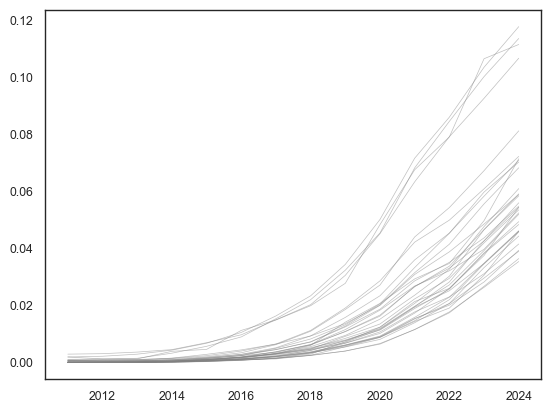

In [33]:
lad_evms_df.T.plot(legend=False, color='grey', alpha=0.5, lw=0.5)

### LAD Boundaries

In [51]:
lad_boundaries = gpd.read_file(filename='data/lad_boundaries/LAD_DEC_24_UK_BGC/LAD_DEC_24_UK_BGC.shp')
lad_boundaries.set_index('LAD24NM', inplace=True)
lad_boundaries.drop(columns=['BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID'], inplace=True)
crs = 25832 # Units of meters
lad_boundaries.to_crs(crs, inplace=False)
london_lad_boundaries = lad_boundaries.loc[london_lad_list]
london_lad_boundaries

LAD24CD LAD24NMW  \
LAD24NM                                      
City of London          E09000001     None   
Barking and Dagenham    E09000002     None   
Barnet                  E09000003     None   
Bexley                  E09000004     None   
Brent                   E09000005     None   
Bromley                 E09000006     None   
Camden                  E09000007     None   
Croydon                 E09000008     None   
Ealing                  E09000009     None   
Enfield                 E09000010     None   
Greenwich               E09000011     None   
Hackney                 E09000012     None   
Hammersmith and Fulham  E09000013     None   
Haringey                E09000014     None   
Harrow                  E09000015     None   
Havering                E09000016     None   
Hillingdon              E09000017     None   
Hounslow                E09000018     None   
Islington               E09000019     None   
Kensington and Chelsea  E09000020     None   
Kingston upon Thames    E09000021     None   
Lambeth                 E09000022     None   
Lewisham                E09000023     None   
Merton                  E09000024     None   
Newham                  E09000025     None   
Redbridge               E09000026     None   
Richmond upon Thames    E09000027     None   
Southwark               E09000028     None   
Sutton                  E09000029     None   
Tower Hamlets           E09000030     None   
Waltham Forest          E09000031     None   
Wandsworth              E09000032     None   
Westminster             E09000033     None   

                                                                 geometry  
LAD24NM                                                                    
City of London          MULTIPOLYGON (((531664.799 180549.346, 531628....  
Barking and Dagenham    MULTIPOLYGON (((543730.589 184059.079, 543871....  
Barnet                  POLYGON ((524645.198 198138.303, 524810.701 19...  
Bexley                  MULTIPOLYGON (((552888.15 175565.3, 552869.5 1...  
Brent                   POLYGON ((520455.988 190041.053, 520638.759 18...  
Bromley                 POLYGON ((542248.836 172787.988, 542455.876 17...  
Camden                  POLYGON ((527104.102 187601.3, 527295.765 1875...  
Croydon                 POLYGON ((531555.4 171047.434, 531786.284 1709...  
Ealing                  POLYGON ((516081.957 185341.943, 516738.65 184...  
Enfield                 POLYGON ((532886 200644.88, 533716.3 200133.98...  
Greenwich               MULTIPOLYGON (((537558.776 177161.465, 537558....  
Hackney                 POLYGON ((534444.098 188327.401, 534648.407 18...  
Hammersmith and Fulham  POLYGON ((522602.74 182969.443, 522821.95 1828...  
Haringey                POLYGON ((529746.649 191724.114, 529839.39 191...  
Harrow                  POLYGON ((517363.803 194171.298, 517446.204 19...  
Havering                POLYGON ((554024.997 194889.303, 554968.999 19...  
Hillingdon              POLYGON ((504316.5 193544.25, 504368.1 193490....  
Hounslow                MULTIPOLYGON (((516363.847 174874.212, 516363....  
Islington               POLYGON ((530547.189 187819.959, 530690.261 18...  
Kensington and Chelsea  POLYGON ((523042.73 182737.905, 523036.616 182...  
Kingston upon Thames    POLYGON ((521692.434 170714.929, 521807.257 17...  
Lambeth                 POLYGON ((531189.5 180531.3, 531212.1 180503.6...  
Lewisham                POLYGON ((536691.162 178958.218, 536911.65 178...  
Merton                  POLYGON ((525951.605 172559.368, 525892.859 17...  
Newham                  POLYGON ((542595.815 186498.795, 542643.419 18...  
Redbridge               POLYGON ((540809.3 193458.8, 541152.601 193021...  
Richmond upon Thames    MULTIPOLYGON (((516084.973 172495.06, 516122.6...  
Southwark               POLYGON ((531628.179 180556.252, 531628.192 18...  
Sutton                  POLYGON ((527681.106 167213.775, 527757.271 16...  
Tower Hamlets           POLYGON ((536737.742 184527.776, 53

### Join Geometries to EV Market Share Data

In [247]:
lad_evms_df_geo = gpd.GeoDataFrame(data=lad_evms_df, geometry=london_lad_boundaries.geometry)
lad_evms_df_geo

2011      2012      2013      2014      2015  \
LAD                                                                        
City of London          0.002000  0.001333  0.001333  0.004000  0.004667   
Barking and Dagenham    0.000038  0.000019  0.000093  0.000198  0.000447   
Barnet                  0.000795  0.000795  0.001022  0.001603  0.002936   
Bexley                  0.000052  0.000083  0.000124  0.000162  0.000379   
Brent                   0.000630  0.000575  0.000650  0.000969  0.001537   
Bromley                 0.000073  0.000137  0.000244  0.000560  0.001067   
Camden                  0.003007  0.003171  0.003725  0.004595  0.007020   
Croydon                 0.000072  0.000087  0.000165  0.000269  0.000603   
Ealing                  0.000191  0.000250  0.000316  0.000653  0.001233   
Enfield                 0.000091  0.000082  0.000208  0.000394  0.000825   
Greenwich               0.000058  0.000087  0.000130  0.000309  0.000713   
Hackney                 0.000426  0.000408  0.000543  0.000610  0.001263   
Hammersmith and Fulham  0.000985  0.001000  0.000925  0.001388  0.002076   
Haringey                0.000639  0.000638  0.000730  0.001023  0.001764   
Harrow                  0.000086  0.000172  0.000276  0.000546  0.001064   
Havering                0.000059  0.000068  0.000086  0.000318  0.000569   
Hillingdon              0.000100  0.000126  0.000186  0.000407  0.000749   
Hounslow                0.000105  0.000104  0.000149  0.000518  0.001029   
Islington               0.000733  0.000994  0.001118  0.001562  0.002463   
Kensington and Chelsea  0.001164  0.001308  0.001548  0.003342  0.005750   
Kingston upon Thames    0.000162  0.000242  0.000273  0.000413  0.001118   
Lambeth                 0.000548  0.000521  0.000536  0.000629  0.001025   
Lewisham                0.000144  0.000189  0.000216  0.000326  0.000649   
Merton                  0.000185  0.000246  0.000244  0.000465  0.000900   
Newham                  0.000017  0.000018  0.000071  0.000086  0.000505   
Redbridge               0.000010  0.000042  0.000135  0.000396  0.000889   
Richmond upon Thames    0.000202  0.000242  0.000428  0.000693  0.001476   
Southwark               0.000587  0.000482  0.000617  0.000802  0.001527   
Sutton                  0.000050  0.000087  0.000123  0.000376  0.000635   
Tower Hamlets           0.000161  0.000083  0.000274  0.000375  0.000897   
Waltham Forest          0.000028  0.000057  0.000113  0.000251  0.000475   
Wandsworth              0.000602  0.000574  0.000617  0.001048  0.001821   
Westminster             0.002017  0.002266  0.002993  0.004407  0.006831   

                            2016      2017      2018      2019      2020  \
LAD                                                                        
City of London          0.011333  0.015000  0.020000  0.027857  0.048462   
Barking and Dagenham    0.001007  0.001333  0.002612  0.005597  0.008876   
Barnet                  0.004492  0.006546  0.009371  0.013737  0.020223   
Bexley                  0.000809  0.001535  0.002606  0.004090  0.006528   
Brent                   0.002488  0.003641  0.006209  0.010975  0.016710   
Bromley                 0.001943  0.003041  0.004606  0.006865  0.010274   
Camden                  0.009800  0.015038  0.020359  0.030654  0.045288   
Croydon                 0.001115  0.002264  0.003852  0.006237  0.009340   
Ealing                  0.001843  0.003126  0.004819  0.009247  0.013579   
Enfield                 0.001189  0.001904  0.003383  0.005915  0.008923   
Greenwich               0.001265  0.002523  0.004328  0.007164  0.011616   
Hackney                 0.002061  0.003836  0.006357  0.011619  0.018448   
Hammersmith and Fulham  0.003485  0.006329  0.011043  0.018663  0.027254   
Haringey                0.002908  0.004588  0.007247  0.012564  0.018775   
Harrow                  0.001875  0.003124  0.005269  0.007986  0.011791   
Havering                0.000977  0.001584  0.002529  0.004087  0.006736   

### Plotting 2024 EV Market Shares

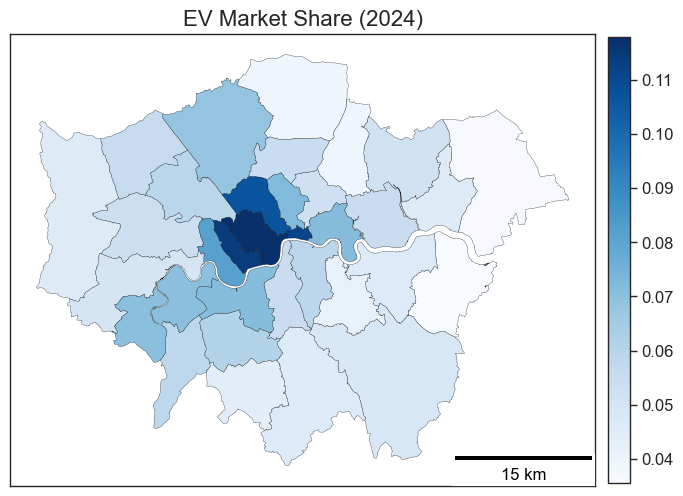

In [271]:
fig, ax = plt.subplots(figsize=(8, 12))

# Define normalization based on the column values
norm = mcolors.Normalize(vmin=lad_evms_df_geo[2024].min(), vmax=lad_evms_df_geo[2024].max())
cmap = plt.cm.Blues

# Plot the GeoDataFrame
lad_evms_df_geo.plot(
    column=2024,
    cmap=cmap,
    ax=ax,
    edgecolor="black",
    linewidth=0.2,
    legend=False  # Disable default legend
)

# Add a colorbar that matches the plot height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.02)  
# cbar.set_label('EV Market Share (2024)', fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=12)

# Add scale bar
ax.add_artist(ScaleBar(1, units='m', length_fraction=0.25, location='lower right', font_properties={"size": 12}))

# Remove ticks
ax.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

ax.set_title('EV Market Share (2024)', fontsize=16)

plt.show()

### RAC Standing Still Off-Street Parking Data

In [115]:
standing_still_df = pd.read_csv('data/standing_still/standing_still_off_street_parking_by_LA_A-Z.csv', thousands=',').set_index('GB Local Authority District')
standing_still_df = standing_still_df.iloc[:, :3]
standing_still_df = standing_still_df .rename(index={"City of Westminster": "Westminster"})
standing_still_df['Proportion of households with off-street parking or parking potential'] = standing_still_df['Households with off-street parking or parking potential'] / standing_still_df['Total households']
standing_still_df.head()

Total households  \
GB Local Authority District                     
Aberdeenshire                          116870   
Adur                                    28009   
Allerdale                               46498   
Amber Valley                            57732   
Angus                                   55083   

                             Households with off-street parking or parking potential  \
GB Local Authority District                                                            
Aberdeenshire                                                            93138         
Adur                                                                     19593         
Allerdale                                                                32988         
Amber Valley                                                             43411         
Angus                                                                    38706         

                             Households without off-street parking or parking potential  \
GB Local Authority District                                                               
Aberdeenshire                                                            23732            
Adur                                                                      8416            
Allerdale                                                                13510            
Amber Valley                                                             14321            
Angus                                                                    16377            

                             Proportion of households with off-street parking or parking potential  
GB Local Authority District                                                                         
Aberdeenshire                                                         0.796937                      
Adur                                                                  0.699525                      
Allerdale                                                             0.709450                      
Amber Valley                                                          0.751940                      
Angus                                                                 0.702685

In [116]:
standing_still_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, Aberdeenshire to GB Total
Data columns (total 4 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Total households                                                       372 non-null    int64  
 1   Households with off-street parking or parking potential                372 non-null    int64  
 2   Households without off-street parking or parking potential             372 non-null    int64  
 3   Proportion of households with off-street parking or parking potential  372 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 14.5+ KB


In [119]:
# london_lad_list_full = np.append(london_lad_list, 'City of Westminster')
# london_lad_list_full = london_lad_list_full[london_lad_list_full != "Westminster"]
# london_lad_list_full

In [245]:
standing_still_df.loc[london_lad_list]

Total households  \
GB Local Authority District                     
City of London                           6587   
Barking and Dagenham                    74316   
Barnet                                 142776   
Bexley                                  97593   
Brent                                   99546   
Bromley                                138551   
Camden                                  75141   
Croydon                                152219   
Ealing                                 123906   
Enfield                                120915   
Greenwich                              113941   
Hackney                                 95099   
Hammersmith and Fulham                  65045   
Haringey                                81303   
Harrow                                  90811   
Havering                               104484   
Hillingdon                             111294   
Hounslow                                98817   
Islington                               81553   
Kensington and Chelsea                  56030   
Kingston upon Thames                    65851   
Lambeth                                114146   
Lewisham                               118399   
Merton                                  81465   
Newham                                 112303   
Redbridge                              102003   
Richmond upon Thames                    80170   
Southwark                              132537   
Sutton                                  82895   
Tower Hamlets                          127545   
Waltham Forest                          95899   
Wandsworth                             123817   
Westminster                             88891   

                             Households with off-street parking or parking potential  \
GB Local Authority District                                                            
City of London                                                               5         
Barking and Dagenham                                                     45756         
Barnet                                                                   77941         
Bexley                                                                   69143         
Brent                                                                    51075         
Bromley                                                                  88516         
Camden                                                                   11246         
Croydon                                                                  78095         
Ealing                                                                   64650         
Enfield                                                                  66995         
Greenwich                                                                45019         
Hackney                                                                  14948         
Hammersmith and Fulham                                                   10942         
Haringey                                                                 26234         
Harrow                                                                   60957         
Havering                                                                 78274         
Hillingdon                                                               77043         
Hounslow                                                                 51291         
Islington                                                                11078         
Kensington and Chelsea                                                    7499         
Kingston upon Thames                                                     40158         
Lambeth                                                                  27384         
Lewisham                                                                 48511         
Merton                                                                   44544         
Newham                   

# Create Combined DataFrame

In [248]:
combined_gdf = lad_evms_df_geo.copy()

# Plot Parking Data

In [250]:
combined_gdf['p_osp'] = standing_still_df.loc[london_lad_list, 'Proportion of households with off-street parking or parking potential']

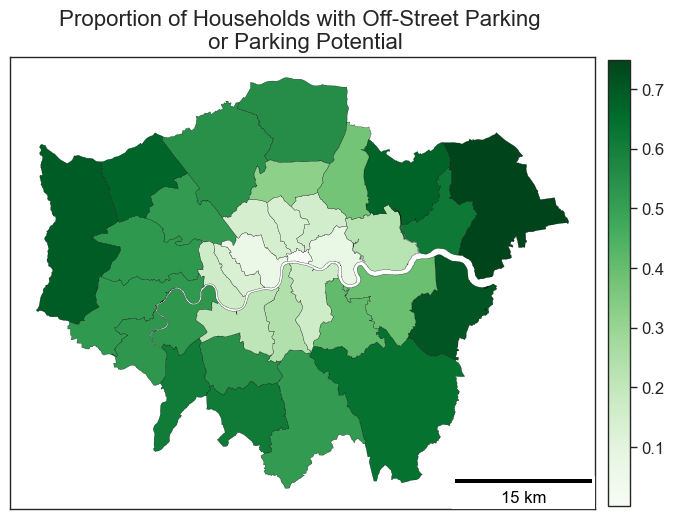

In [270]:
fig, ax = plt.subplots(figsize=(8, 12))

# Define normalization based on the column values
norm = mcolors.Normalize(vmin=combined_gdf['p_osp'].min(), vmax=combined_gdf['p_osp'].max())
cmap = plt.cm.Greens

# Plot the GeoDataFrame
combined_gdf.plot(
    column='p_osp',
    cmap=cmap,
    ax=ax,
    edgecolor="black",
    linewidth=0.2,
    legend=False  # Disable default legend
)

# Add a colorbar that matches the plot height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.02)  
# cbar.set_label('Proportion of Households with Off-Street Parking \n or Parking Potential', fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=12)

# Add scale bar
ax.add_artist(ScaleBar(1, units='m', length_fraction=0.25, location='lower right', font_properties={"size": 12}))

# Remove ticks
ax.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

ax.set_title('Proportion of Households with Off-Street Parking \n or Parking Potential', fontsize=16)

plt.show()

# Load Public Charging Data

In [131]:
os.environ['USE_PYGEOS'] = '0'
from requests import get

endpoint = ('https://api.openchargemap.io/v3/poi/') # Using the OpenChargeMap API

parameters = {
    'countrycode':'GB',
    'maxresults': 1000000,
    'key': 'b7c88c66-3a61-401e-8b9e-437f66554a9d' # My unique API Key
}

response = get(endpoint, params = parameters)
json_data = response.json()
json_data

[{'DataProvider': {'WebsiteURL': 'http://openchargemap.org',
   'Comments': None,
   'DataProviderStatusType': {'IsProviderEnabled': True,
    'ID': 1,
    'Title': 'Manual Data Entry'},
   'IsRestrictedEdit': False,
   'IsOpenDataLicensed': True,
   'IsApprovedImport': True,
   'License': 'Licensed under Creative Commons Attribution 4.0 International (CC BY 4.0)',
   'DateLastImported': None,
   'ID': 1,
   'Title': 'Open Charge Map Contributors'},
  'OperatorInfo': {'WebsiteURL': 'https://map.zest.uk.com/',
   'Comments': 'bespoke mobile phone app required',
   'PhonePrimaryContact': '+44 333 577 6760',
   'PhoneSecondaryContact': None,
   'IsPrivateIndividual': False,
   'AddressInfo': None,
   'BookingURL': None,
   'ContactEmail': None,
   'FaultReportEmail': None,
   'IsRestrictedEdit': False,
   'ID': 3581,
   'Title': 'Zest Charging'},
  'UsageType': {'IsPayAtLocation': False,
   'IsMembershipRequired': True,
   'IsAccessKeyRequired': True,
   'ID': 4,
   'Title': 'Public - Mem

In [132]:
def json_to_dataframe(json_data, column_names):
    
    df = pd.DataFrame(columns = column_names)

    for i in tqdm(range(len(json_data))):
        if len(json_data[i]['Connections']) > 1:
            for j in range(len(json_data[i]['Connections'])):
                try:
                    mapper = {
                        'ID': str(json_data[i]['AddressInfo']['ID']),
                        'Title': str(json_data[i]['AddressInfo']['Title']),
                        'Town': str(json_data[i]['AddressInfo']['Town']),
                        'Operator': json_data[i]['OperatorInfo']['Title'],
                        'Operational': json_data[i]['Connections'][j]['StatusType']['IsOperational'],
                        'Connection_Type': json_data[i]['Connections'][j]['ConnectionType']['Title'],
                        'Number_of_Points': json_data[i]['Connections'][j]['Quantity'],
                        'Current_Type': json_data[i]['Connections'][j]['CurrentType']['Title'],
                        'Power_KW': json_data[i]['Connections'][j]['PowerKW'],
                        'Usage': json_data[i]['UsageType']['Title'],
                        'Cost': json_data[i]['UsageCost'],
                        'Latitude': json_data[i]['AddressInfo']['Latitude'],
                        'Longitude': json_data[i]['AddressInfo']['Longitude'],
                        }
                    s = pd.Series(mapper)
                    df = pd.concat([df, s.to_frame().T], ignore_index=True, axis=0)
                except:
                    pass
        else:
            try:
                mapper = {
                    'ID': str(json_data[i]['AddressInfo']['ID']),
                    'Title': str(json_data[i]['AddressInfo']['Title']),
                    'Town': str(json_data[i]['AddressInfo']['Town']),
                    'Operator': json_data[i]['OperatorInfo']['Title'],
                    'Operational': json_data[i]['Connections'][0]['StatusType']['IsOperational'],
                    'Connection_Type': json_data[i]['Connections'][0]['ConnectionType']['Title'],
                    'Number_of_Points': json_data[i]['NumberOfPoints'],
                    'Current_Type': json_data[i]['Connections'][0]['CurrentType']['Title'],
                    'Power_KW': json_data[i]['Connections'][0]['PowerKW'],
                    'Usage': json_data[i]['UsageType']['Title'],
                    'Cost': json_data[i]['UsageCost'],
                    'Latitude': json_data[i]['AddressInfo']['Latitude'],
                    'Longitude': json_data[i]['AddressInfo']['Longitude']
                }
                s = pd.Series(mapper)
                df = pd.concat([df, s.to_frame().T], ignore_index=True, axis=0)
            except:
                pass
    return df

In [133]:
column_names = [
    'ID', 
    'Title', 
    'Town',
    'Operator', 
    'Operational', 
    'Connection_Type', 
    'Number_of_Points', 
    'Current_Type', 
    'Power_KW', 
    'Usage',
    'Cost',
    'Latitude', 
    'Longitude'
]

GB_chargers_df = json_to_dataframe(json_data, column_names)
GB_chargers_df.head()

ID                  Title       Town       Operator Operational  \
0  461486          Home Bargains  Ballykeel  Zest Charging        True   
1  461485          Home Bargains       None  Zest Charging        True   
2  461484  Kennedy Centre (Rear)    Belfast  Zest Charging        True   
3  461483             McDonald's     Bangor  InstaVolt Ltd        True   
4  461483             McDonald's     Bangor  InstaVolt Ltd        True   

        Connection_Type Number_of_Points      Current_Type Power_KW  \
0  Type 2 (Socket Only)                4  AC (Three-Phase)       22   
1  Type 2 (Socket Only)                4  AC (Three-Phase)       22   
2          CCS (Type 2)                6                DC     None   
3          CCS (Type 2)                2                DC     None   
4               CHAdeMO                1                DC     None   

                          Usage  Cost   Latitude Longitude  
0  Public - Membership Required  None  54.856869 -6.277695  
1  Public - Membership Required  None  54.711569 -5.826839  
2  Public - Membership Required  None  54.582131 -5.978269  
3  Public - Membership Required  None  54.647116 -5.658857  
4  Public - Membership Required  None  54.647116 -5.658857

In [134]:
GB_chargers_gdf = gpd.GeoDataFrame(GB_chargers_df, geometry=gpd.points_from_xy(GB_chargers_df.Longitude, GB_chargers_df.Latitude))
GB_chargers_gdf.crs = 'epsg:4326'
GB_chargers_gdf.head()

ID                  Title       Town       Operator Operational  \
0  461486          Home Bargains  Ballykeel  Zest Charging        True   
1  461485          Home Bargains       None  Zest Charging        True   
2  461484  Kennedy Centre (Rear)    Belfast  Zest Charging        True   
3  461483             McDonald's     Bangor  InstaVolt Ltd        True   
4  461483             McDonald's     Bangor  InstaVolt Ltd        True   

        Connection_Type Number_of_Points      Current_Type Power_KW  \
0  Type 2 (Socket Only)                4  AC (Three-Phase)       22   
1  Type 2 (Socket Only)                4  AC (Three-Phase)       22   
2          CCS (Type 2)                6                DC     None   
3          CCS (Type 2)                2                DC     None   
4               CHAdeMO                1                DC     None   

                          Usage  Cost   Latitude Longitude  \
0  Public - Membership Required  None  54.856869 -6.277695   
1  Public - Membership Required  None  54.711569 -5.826839   
2  Public - Membership Required  None  54.582131 -5.978269   
3  Public - Membership Required  None  54.647116 -5.658857   
4  Public - Membership Required  None  54.647116 -5.658857   

                    geometry  
0  POINT (-6.27769 54.85687)  
1  POINT (-5.82684 54.71157)  
2  POINT (-5.97827 54.58213)  
3  POINT (-5.65886 54.64712)  
4  POINT (-5.65886 54.64712)

Save data to pickle file.

In [136]:
GB_chargers_gdf.to_pickle('data/public_chargers/GB_public_charger_locations_ocm.pkl')

### Filter for London Public Chargers

In [223]:
london_public_chargers_gdf = GB_chargers_gdf.loc[GB_chargers_gdf.within(london_lad_boundaries.to_crs('epsg:4326').union_all())].reset_index(drop=True)
london_public_chargers_gdf.head()

ID                      Title    Town                       Operator  \
0  461458  Near 69 St James Crescent    None                        Char.gy   
1  460785         15 Berkeley Square    None            Total Energies (UK)   
2  460783             20 Soho Square    None  Shell Recharge Solutions (UK)   
3  460765               Gordon Grove  London                       Clenergy   
4  459362           4 Arundel Street  London  Shell Recharge Solutions (UK)   

  Operational       Connection_Type Number_of_Points       Current_Type  \
0        True  Type 2 (Socket Only)                1  AC (Single-Phase)   
1        True  Type 2 (Socket Only)                2   AC (Three-Phase)   
2        True  Type 2 (Socket Only)                1  AC (Single-Phase)   
3        True  Type 2 (Socket Only)                1  AC (Single-Phase)   
4        True  Type 2 (Socket Only)                1  AC (Single-Phase)   

  Power_KW                         Usage  Cost   Latitude Longitude  \
0        5                        Public  None  51.465068 -0.109022   
1       22                        Public  None  51.509872 -0.145322   
2        4                        Public  None   51.51556 -0.131894   
3      3.5  Public - Membership Required  None  51.468437 -0.103547   
4        5                        Public  None  51.512321 -0.114325   

                    geometry  
0  POINT (-0.10902 51.46507)  
1  POINT (-0.14532 51.50987)  
2  POINT (-0.13189 51.51556)  
3  POINT (-0.10355 51.46844)  
4  POINT (-0.11433 51.51232)

In [259]:
london_public_chargers_gdf['Number_of_Points'] = london_public_chargers_gdf['Number_of_Points'].astype(float).fillna(1.0)

In [260]:
london_public_chargers_gdf['Number_of_Points'].unique()

array([ 1.,  2.,  7.,  4.,  6., 12., 24., 16.,  8., 15.,  5., 60., 10.,
        3., 14., 58., 53., 20., 36., 23., 18., 13., 30., 17.,  9., 34.,
       40., 74., 22.])

In [227]:
london_public_chargers_gdf['Number_of_Points'].size

15419

In [228]:
london_public_chargers_gdf['Number_of_Points'].sum()

20070.0

In [212]:
london_public_chargers_gdf['Number_of_Points'].value_counts()

Number_of_Points
1.0     13281
2.0      1236
3.0       553
4.0       157
5.0        60
6.0        29
8.0        26
12.0       16
10.0       13
7.0         6
16.0        6
20.0        5
14.0        5
15.0        5
18.0        4
24.0        3
30.0        2
60.0        1
58.0        1
53.0        1
36.0        1
23.0        1
13.0        1
17.0        1
9.0         1
34.0        1
40.0        1
74.0        1
22.0        1
Name: count, dtype: int64

In [255]:
# Spatial join once for all LADs
joined = gpd.sjoin(london_public_chargers_gdf, combined_gdf.to_crs('epsg:4326'), how="inner", predicate="within")

# Count chargers per LAD
counts_stations = joined.groupby('LAD').size()

# Sum the 'Number_of_Points' for each LAD
counts_points = joined.groupby('LAD')['Number_of_Points'].sum()

# Assign counts back to dataframe and replace NaN with 0 for LADs with no chargers
combined_gdf['Public EV Chargers (Points)'] = counts_points.fillna(0).astype(int)
combined_gdf['Public EV Chargers (Stations)'] = counts_stations.fillna(0).astype(int)

combined_gdf

2011      2012      2013      2014      2015  \
LAD                                                                        
City of London          0.002000  0.001333  0.001333  0.004000  0.004667   
Barking and Dagenham    0.000038  0.000019  0.000093  0.000198  0.000447   
Barnet                  0.000795  0.000795  0.001022  0.001603  0.002936   
Bexley                  0.000052  0.000083  0.000124  0.000162  0.000379   
Brent                   0.000630  0.000575  0.000650  0.000969  0.001537   
Bromley                 0.000073  0.000137  0.000244  0.000560  0.001067   
Camden                  0.003007  0.003171  0.003725  0.004595  0.007020   
Croydon                 0.000072  0.000087  0.000165  0.000269  0.000603   
Ealing                  0.000191  0.000250  0.000316  0.000653  0.001233   
Enfield                 0.000091  0.000082  0.000208  0.000394  0.000825   
Greenwich               0.000058  0.000087  0.000130  0.000309  0.000713   
Hackney                 0.000426  0.000408  0.000543  0.000610  0.001263   
Hammersmith and Fulham  0.000985  0.001000  0.000925  0.001388  0.002076   
Haringey                0.000639  0.000638  0.000730  0.001023  0.001764   
Harrow                  0.000086  0.000172  0.000276  0.000546  0.001064   
Havering                0.000059  0.000068  0.000086  0.000318  0.000569   
Hillingdon              0.000100  0.000126  0.000186  0.000407  0.000749   
Hounslow                0.000105  0.000104  0.000149  0.000518  0.001029   
Islington               0.000733  0.000994  0.001118  0.001562  0.002463   
Kensington and Chelsea  0.001164  0.001308  0.001548  0.003342  0.005750   
Kingston upon Thames    0.000162  0.000242  0.000273  0.000413  0.001118   
Lambeth                 0.000548  0.000521  0.000536  0.000629  0.001025   
Lewisham                0.000144  0.000189  0.000216  0.000326  0.000649   
Merton                  0.000185  0.000246  0.000244  0.000465  0.000900   
Newham                  0.000017  0.000018  0.000071  0.000086  0.000505   
Redbridge               0.000010  0.000042  0.000135  0.000396  0.000889   
Richmond upon Thames    0.000202  0.000242  0.000428  0.000693  0.001476   
Southwark               0.000587  0.000482  0.000617  0.000802  0.001527   
Sutton                  0.000050  0.000087  0.000123  0.000376  0.000635   
Tower Hamlets           0.000161  0.000083  0.000274  0.000375  0.000897   
Waltham Forest          0.000028  0.000057  0.000113  0.000251  0.000475   
Wandsworth              0.000602  0.000574  0.000617  0.001048  0.001821   
Westminster             0.002017  0.002266  0.002993  0.004407  0.006831   

                            2016      2017      2018      2019      2020  \
LAD                                                                        
City of London          0.011333  0.015000  0.020000  0.027857  0.048462   
Barking and Dagenham    0.001007  0.001333  0.002612  0.005597  0.008876   
Barnet                  0.004492  0.006546  0.009371  0.013737  0.020223   
Bexley                  0.000809  0.001535  0.002606  0.004090  0.006528   
Brent                   0.002488  0.003641  0.006209  0.010975  0.016710   
Bromley                 0.001943  0.003041  0.004606  0.006865  0.010274   
Camden                  0.009800  0.015038  0.020359  0.030654  0.045288   
Croydon                 0.001115  0.002264  0.003852  0.006237  0.009340   
Ealing                  0.001843  0.003126  0.004819  0.009247  0.013579   
Enfield                 0.001189  0.001904  0.003383  0.005915  0.008923   
Greenwich               0.001265  0.002523  0.004328  0.007164  0.011616   
Hackney                 0.002061  0.003836  0.006357  0.011619  0.018448   
Hammersmith and Fulham  0.003485  0.006329  0.011043  0.018663  0.027254   
Haringey                0.002908  0.004588  0.007247  0.012564  0.018775   
Harrow                  0.001875  0.003124  0.005269  0.007986  0.011791   
Havering                0.000977  0.001584  0.002529  0.004087  0.006736   

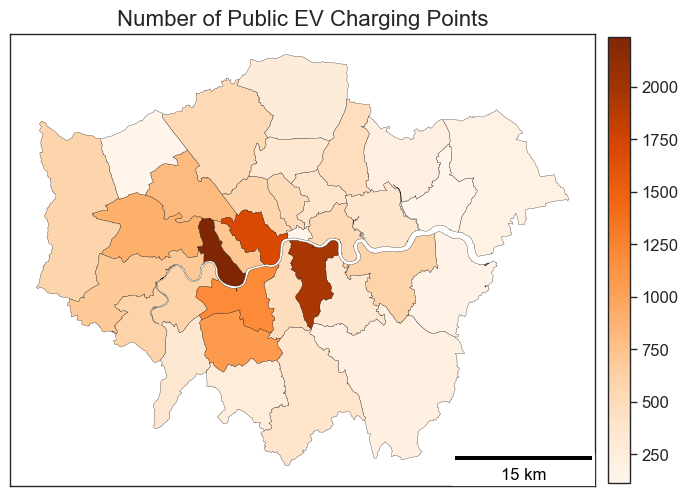

In [268]:
fig, ax = plt.subplots(figsize=(8, 12))

# Define normalization based on the column values
norm = mcolors.Normalize(vmin=combined_gdf['Public EV Chargers (Points)'].min(), vmax=combined_gdf['Public EV Chargers (Points)'].max())
cmap = plt.cm.Oranges

# Plot the GeoDataFrame
combined_gdf.plot(
    column='Public EV Chargers (Points)',
    cmap=cmap,
    ax=ax,
    edgecolor="black",
    linewidth=0.2,
    legend=False  # Disable default legend
)

# Add a colorbar that matches the plot height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.02)  
# cbar.set_label('Number of Public EV Chargers (Points)', fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=12)

# Add scale bar
ax.add_artist(ScaleBar(1, units='m', length_fraction=0.25, location='lower right', font_properties={"size": 12}))

# Remove ticks
ax.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

ax.set_title('Number of Public EV Charging Points', fontsize=16)

plt.show()

# Index of Multiple Deprivation

In [272]:
imd_gdf = gpd.read_file('data/English IMD 2019/IMD_2019.shp')

In [284]:
imd_gdf.head()

lsoa11cd                   lsoa11nm                  lsoa11nmw  \
0  E01000001        City of London 001A        City of London 001A   
1  E01000002        City of London 001B        City of London 001B   
2  E01000003        City of London 001C        City of London 001C   
3  E01000005        City of London 001E        City of London 001E   
4  E01000006  Barking and Dagenham 016A  Barking and Dagenham 016A   

      st_areasha   st_lengths  IMD_Rank  IMD_Decile  \
0  133320.768872  2291.846072     29199           9   
1  226191.272990  2433.960112     30379          10   
2   57302.966538  1142.359799     14915           5   
3  190738.760504  2167.868343      8678           3   
4  144195.846857  1935.510354     14486           5   

                    LSOA01NM      LADcd                 LADnm  ...  IndDec  \
0        City of London 001A  E09000001        City of London  ...       5   
1        City of London 001B  E09000001        City of London  ...       7   
2        City of London 001C  E09000001        City of London  ...       6   
3        City of London 001E  E09000001        City of London  ...       8   
4  Barking and Dagenham 016A  E09000002  Barking and Dagenham  ...       5   

   OutScore  OutRank  OutDec  TotPop  DepChi  Pop16_59  Pop60+  WorkPop  \
0     1.503     1615       1    1296     175       656     465   715.00   
1     1.196     2969       1    1156     182       580     394   619.75   
2     2.207      162       1    1350     146       759     445   804.00   
3     1.769      849       1    1121     229       692     200   683.00   
4     0.969     4368       2    2040     522      1297     221  1284.50   

                                            geometry  
0  POLYGON ((532105.092 182011.23, 532162.491 181...  
1  POLYGON ((532746.813 181786.891, 532671.688 18...  
2  POLYGON ((532135.145 182198.119, 532158.25 182...  
3  POLYGON ((533807.946 180767.77, 533649.063 180...  
4  POLYGON ((545122.049 184314.931, 545271.917 18...  

[5 rows x 64 columns]

In [285]:
imd_gdf.columns

Index(['lsoa11cd', 'lsoa11nm', 'lsoa11nmw', 'st_areasha', 'st_lengths',
       'IMD_Rank', 'IMD_Decile', 'LSOA01NM', 'LADcd', 'LADnm', 'IMDScore',
       'IMDRank0', 'IMDDec0', 'IncScore', 'IncRank', 'IncDec', 'EmpScore',
       'EmpRank', 'EmpDec', 'EduScore', 'EduRank', 'EduDec', 'HDDScore',
       'HDDRank', 'HDDDec', 'CriScore', 'CriRank', 'CriDec', 'BHSScore',
       'BHSRank', 'BHSDec', 'EnvScore', 'EnvRank', 'EnvDec', 'IDCScore',
       'IDCRank', 'IDCDec', 'IDOScore', 'IDORank', 'IDODec', 'CYPScore',
       'CYPRank', 'CYPDec', 'ASScore', 'ASRank', 'ASDec', 'GBScore', 'GBRank',
       'GBDec', 'WBScore', 'WBRank', 'WBDec', 'IndScore', 'IndRank', 'IndDec',
       'OutScore', 'OutRank', 'OutDec', 'TotPop', 'DepChi', 'Pop16_59',
       'Pop60+', 'WorkPop', 'geometry'],
      dtype='object')

In [282]:
london_imd_gdf = imd_gdf[imd_gdf['LADnm'].isin(london_lad_list)]

In [283]:
london_imd_gdf['LADnm'].unique()

array(['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

In [286]:
london_imd_gdf['IMDScore']

0         6.208
1         5.143
2        19.402
3        28.652
4        19.837
          ...  
32817    13.105
32818    20.968
32819    29.363
32820    22.101
32821    21.824
Name: IMDScore, Length: 4835, dtype: float64

In [290]:
london_imd_gdf['TotPop']

0        1296
1        1156
2        1350
3        1121
4        2040
         ... 
32817    1701
32818    2426
32819    1900
32820    1954
32821    1394
Name: TotPop, Length: 4835, dtype: int64

In [293]:
# Total weighted score and total population
weighted_sum = london_imd_gdf.groupby('LADnm')[['IMDScore', 'TotPop']].apply(lambda x: (x['IMDScore'] * x['TotPop']).sum())
total_population = london_imd_gdf.groupby('LADnm')['TotPop'].sum()

# Final weighted average
lad_weighted_imd = (weighted_sum / total_population).reset_index(name='Weighted_IMD_Score').set_index('LADnm')
lad_weighted_imd

Weighted_IMD_Score
LADnm                                     
Barking and Dagenham             32.768190
Barnet                           16.148219
Bexley                           16.273359
Brent                            25.557941
Bromley                          14.163334
Camden                           20.130584
City of London                   14.720484
Croydon                          22.477258
Ealing                           22.709747
Enfield                          25.781374
Greenwich                        24.464210
Hackney                          32.526051
Hammersmith and Fulham           22.270272
Haringey                         27.955649
Harrow                           15.030632
Havering                         16.788709
Hillingdon                       18.223071
Hounslow                         21.487437
Islington                        27.535321
Kensington and Chelsea           21.525501
Kingston upon Thames             11.381295
Lambeth                          25.422228
Lewisham                         26.660891
Merton                           14.649061
Newham                           29.576935
Redbridge                        17.203200
Richmond upon Thames              9.424622
Southwark                        25.810813
Sutton                           13.986727
Tower Hamlets                    27.912695
Waltham Forest                   25.208961
Wandsworth                       16.611465
Westminster                      20.339038

In [294]:
combined_gdf['Weighted_IMD_Score'] = lad_weighted_imd

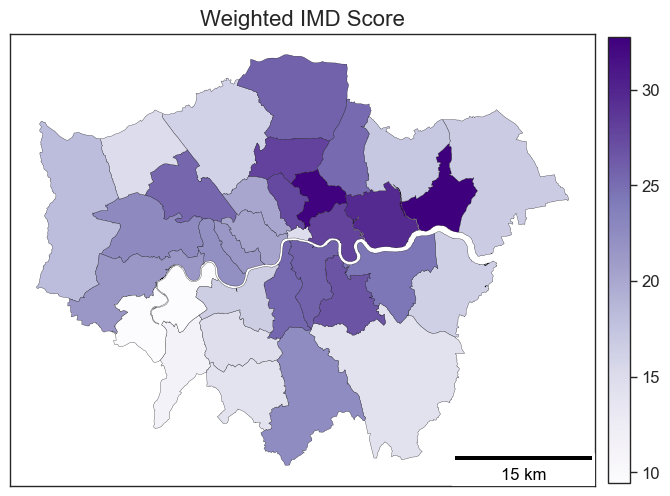

In [298]:
fig, ax = plt.subplots(figsize=(8, 12))

# Define normalization based on the column values
norm = mcolors.Normalize(vmin=combined_gdf['Weighted_IMD_Score'].min(), vmax=combined_gdf['Weighted_IMD_Score'].max())
cmap = plt.cm.Purples

# Plot the GeoDataFrame
combined_gdf.plot(
    column='Weighted_IMD_Score',
    cmap=cmap,
    ax=ax,
    edgecolor="black",
    linewidth=0.2,
    legend=False  # Disable default legend
)

# Add a colorbar that matches the plot height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.02)  
cbar.ax.tick_params(labelsize=12)

# Add scale bar
ax.add_artist(ScaleBar(1, units='m', length_fraction=0.25, location='lower right', font_properties={"size": 12}))

# Remove ticks
ax.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

ax.set_title('Weighted IMD Score', fontsize=16)

plt.show()

# Combined Plot

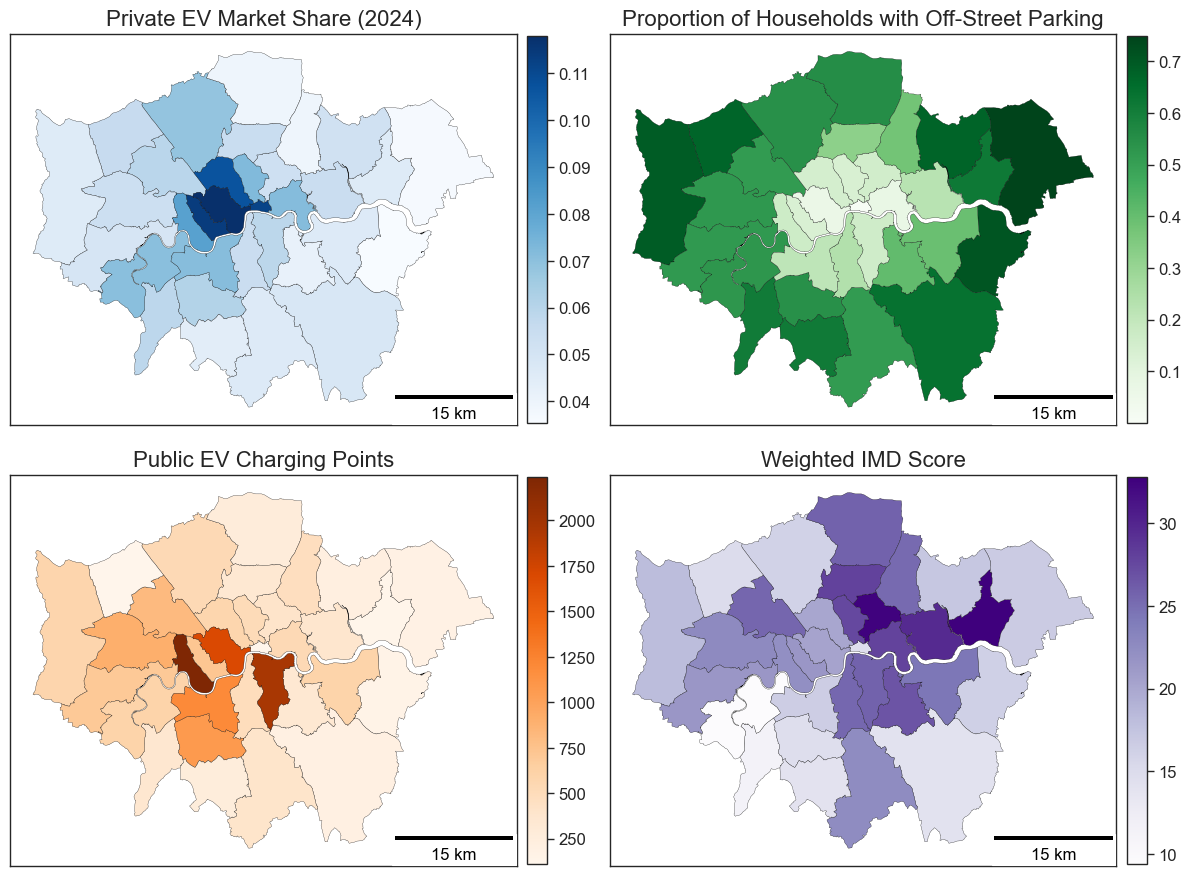

In [310]:
columns = [2024, 'p_osp', 'Public EV Chargers (Points)', 'Weighted_IMD_Score']
titles = [
    'Private EV Market Share (2024)',
    'Proportion of Households with Off-Street Parking',
    'Public EV Charging Points',
    'Weighted IMD Score'
]

color_maps = [plt.cm.Blues, plt.cm.Greens, plt.cm.Oranges, plt.cm.Purples]

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Flatten axes array to easily iterate
axes = axes.flatten()

# Loop through each plot
for i, ax in enumerate(axes):
    col = columns[i]

    # Define anormalization
    norm = mcolors.Normalize(
        vmin=combined_gdf[col].min(),
        vmax=combined_gdf[col].max()
    )
    cmap = color_maps[i]

    # Plot the GeoDataFrame
    combined_gdf.plot(
        column=col,
        cmap=cmap,
        norm=norm,
        ax=ax,
        edgecolor="black",
        linewidth=0.2,
        legend=False
    )

    # Add scale bar
    ax.add_artist(ScaleBar(1, units='m', length_fraction=0.25, location='lower right', font_properties={"size": 12}))

    # Remove ticks
    ax.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

    # Set title
    ax.set_title(titles[i], fontsize=16)

    # Add a colorbar for subplot
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.036, pad=0.02)
    cbar.ax.tick_params(labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

# Number of EVs

In [313]:
lad_data_processor.lad_ev_df.T

2011   2012   2013   2014   2015   2016   2017  \
LAD                                                                       
City of London            3.0    2.0    2.0    6.0    7.0   17.0   21.0   
Barking and Dagenham      2.0    1.0    5.0   11.0   26.0   60.0   80.0   
Barnet                  103.0  103.0  133.0  211.0  392.0  606.0  885.0   
Bexley                    5.0    8.0   12.0   16.0   38.0   82.0  156.0   
Brent                    52.0   47.0   53.0   80.0  130.0  214.0  312.0   
Bromley                  10.0   19.0   34.0   79.0  152.0  279.0  437.0   
Camden                  126.0  130.0  152.0  187.0  285.0  392.0  594.0   
Croydon                   9.0   11.0   21.0   35.0   80.0  150.0  305.0   
Ealing                   20.0   26.0   33.0   69.0  133.0  200.0  337.0   
Enfield                  10.0    9.0   23.0   44.0   94.0  137.0  219.0   
Greenwich                 4.0    6.0    9.0   22.0   52.0   94.0  188.0   
Hackney                  16.0   15.0   20.0   23.0   49.0   81.0  150.0   
Hammersmith and Fulham   39.0   39.0   36.0   54.0   82.0  138.0  250.0   
Haringey                 37.0   36.0   41.0   58.0  103.0  173.0  273.0   
Harrow                    8.0   16.0   26.0   52.0  103.0  183.0  304.0   
Havering                  6.0    7.0    9.0   34.0   62.0  108.0  175.0   
Hillingdon               11.0   14.0   21.0   47.0   88.0  149.0  257.0   
Hounslow                  9.0    9.0   13.0   46.0   93.0  143.0  263.0   
Islington                25.0   33.0   37.0   52.0   83.0  138.0  218.0   
Kensington and Chelsea   49.0   54.0   63.0  135.0  230.0  358.0  605.0   
Kingston upon Thames     10.0   15.0   17.0   26.0   71.0  127.0  210.0   
Lambeth                  32.0   30.0   31.0   37.0   62.0  117.0  235.0   
Lewisham                 10.0   13.0   15.0   23.0   47.0   92.0  155.0   
Merton                   12.0   16.0   16.0   31.0   61.0  107.0  229.0   
Newham                    1.0    1.0    4.0    5.0   31.0   57.0  103.0   
Redbridge                 1.0    4.0   13.0   39.0   89.0  130.0  230.0   
Richmond upon Thames     15.0   18.0   32.0   52.0  111.0  187.0  382.0   
Southwark                31.0   25.0   32.0   42.0   82.0  140.0  251.0   
Sutton                    4.0    7.0   10.0   31.0   53.0  113.0  189.0   
Tower Hamlets             6.0    3.0   10.0   14.0   35.0   72.0  124.0   
Waltham Forest            2.0    4.0    8.0   18.0   35.0   67.0  114.0   
Wandsworth               47.0   44.0   47.0   80.0  140.0  226.0  403.0   
Westminster              95.0  104.0  135.0  197.0  304.0  468.0  714.0   

                          2018    2019    2020    2021    2022    2023    2024  
LAD                                                                             
City of London            28.0    39.0    63.0    88.0   103.0   128.0   134.0  
Barking and Dagenham     158.0   342.0   545.0   874.0  1157.0  1846.0  2777.0  
Barnet                  1267.0  1860.0  2718.0  4179.0  5489.0  7278.0  8891.0  
Bexley                   264.0   416.0   660.0  1163.0  1762.0  2584.0  3475.0  
Brent                    529.0   934.0  1412.0  2203.0  2795.0  3818.0  4822.0  
Bromley                  660.0   983.0  1464.0  2454.0  3633.0  5250.0  6610.0  
Camden                   794.0  1171.0  1730.0  2329.0  2863.0  3284.0  3718.0  
Croydon                  520.0   842.0  1259.0  2119.0  3022.0  4508.0  5977.0  
Ealing                   519.0   995.0  1453.0  2371.0  3126.0  4377.0  5595.0  
Enfield                  388.0   679.0  1019.0  1726.0  2316.0  3264.0  4271.0  
Greenwich                325.0   538.0   877.0  1444.0  1851.0  2509.0  3298.0  
Hackney                  246.0   445.0   725.0  1028.0  1213.0  1481.0  1929.0  
Hammersmith and Fulham   434.0   726.0  1082.0  1725.0  2096.0  2554.0  3067.0  
Haringey                 429.0   740.0  1119.0  1668.0  2028.0  2488.0  3099.0  
Harrow                   510.0   773.0  1126.0  1843.0  2638.0  3898.0  5088.0  
Havering              

In [556]:
lad_data_processor.lad_ev_df.T[2024]

LAD
City of London             134.0
Barking and Dagenham      2777.0
Barnet                    8891.0
Bexley                    3475.0
Brent                     4822.0
Bromley                   6610.0
Camden                    3718.0
Croydon                   5977.0
Ealing                    5595.0
Enfield                   4271.0
Greenwich                 3298.0
Hackney                   1929.0
Hammersmith and Fulham    3067.0
Haringey                  3099.0
Harrow                    5088.0
Havering                  3886.0
Hillingdon                5413.0
Hounslow                  4394.0
Islington                 2150.0
Kensington and Chelsea    3959.0
Kingston upon Thames      3572.0
Lambeth                   3057.0
Lewisham                  2903.0
Merton                    3897.0
Newham                    3413.0
Redbridge                 5005.0
Richmond upon Thames      4985.0
Southwark                 2990.0
Sutton                    3590.0
Tower Hamlets             2955.0
Waltha

# Number of Vehicles

In [557]:
lad_data_processor.lad_v_df.T[2024]

Geography
City of London              1200.0
Barking and Dagenham       60300.0
Barnet                    130000.0
Bexley                     97900.0
Brent                      81400.0
Bromley                   136300.0
Camden                     34800.0
Croydon                   129100.0
Ealing                    104300.0
Enfield                   109200.0
Greenwich                  71500.0
Hackney                    36700.0
Hammersmith and Fulham     37700.0
Haringey                   56400.0
Harrow                     90700.0
Havering                  106400.0
Hillingdon                117800.0
Hounslow                   88800.0
Islington                  29700.0
Kensington and Chelsea     34800.0
Kingston upon Thames       61000.0
Lambeth                    56100.0
Lewisham                   69700.0
Merton                     63800.0
Newham                     62600.0
Redbridge                  96100.0
Richmond upon Thames       70800.0
Southwark                  50700.0
Sutton    

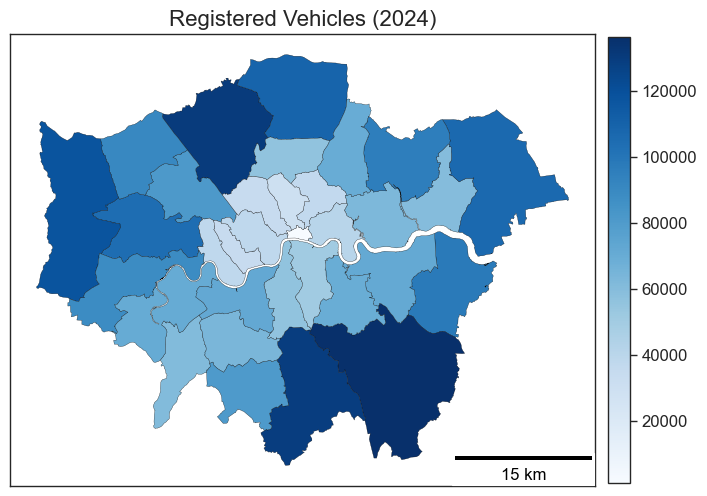

In [559]:
fig, ax = plt.subplots(figsize=(8, 12))

# Define normalization based on the column values
norm = mcolors.Normalize(vmin=lad_data_processor.lad_v_df.T[2024].min(), vmax=lad_data_processor.lad_v_df.T[2024].max())
cmap = plt.cm.Blues

# Plot the GeoDataFrame
gpd.GeoDataFrame(data=lad_data_processor.lad_v_df.T[2024], geometry=combined_gdf.geometry).plot(
    column=2024,
    cmap=cmap,
    ax=ax,
    edgecolor="black",
    linewidth=0.2,
    legend=False  # Disable default legend
)

# Add a colorbar that matches the plot height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.02)  
cbar.ax.tick_params(labelsize=12)

# Add scale bar
ax.add_artist(ScaleBar(1, units='m', length_fraction=0.25, location='lower right', font_properties={"size": 12}))

# Remove ticks
ax.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

ax.set_title('Registered Vehicles (2024)', fontsize=16)

plt.show()

# Census Data on Car and Van Ownership

In [315]:
census_cars = pd.read_csv('data/Census 2021/car_and_van_availability.csv')
census_cars.head()

Lower tier local authorities Code Lower tier local authorities  \
0                         E06000001                   Hartlepool   
1                         E06000001                   Hartlepool   
2                         E06000001                   Hartlepool   
3                         E06000001                   Hartlepool   
4                         E06000001                   Hartlepool   

   Car or van availability (5 categories) Code  \
0                                           -8   
1                                            0   
2                                            1   
3                                            2   
4                                            3   

  Car or van availability (5 categories)  Observation  
0                         Does not apply            0  
1           No cars or vans in household        12102  
2              1 car or van in household        16635  
3            2 cars or vans in household         9259  
4    3 or more cars or vans in household         2934

In [316]:
census_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Lower tier local authorities Code            1655 non-null   object
 1   Lower tier local authorities                 1655 non-null   object
 2   Car or van availability (5 categories) Code  1655 non-null   int64 
 3   Car or van availability (5 categories)       1655 non-null   object
 4   Observation                                  1655 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 64.8+ KB


In [319]:
census_cars = census_cars[census_cars['Car or van availability (5 categories) Code'] != -8]

In [326]:
census_cars['car_counts'] = (census_cars['Car or van availability (5 categories) Code'] * census_cars['Observation'])
census_cars_total = census_cars.groupby('Lower tier local authorities')['car_counts'].sum()
census_cars_total

Lower tier local authorities
Adur            35433
Allerdale       57796
Amber Valley    77721
Arun            97819
Ashfield        68748
                ...  
Wrexham         76769
Wychavon        89113
Wyre            65947
Wyre Forest     63050
York            96154
Name: car_counts, Length: 331, dtype: int64

In [327]:
census_cars_total[london_lad_list]

Lower tier local authorities
City of London              1329
Barking and Dagenham       66369
Barnet                    149954
Bexley                    112819
Brent                      91019
Bromley                   157314
Camden                     40391
Croydon                   145817
Ealing                    116182
Enfield                   120629
Greenwich                  84783
Hackney                    42936
Hammersmith and Fulham     41242
Haringey                   61081
Harrow                    102041
Havering                  123765
Hillingdon                131396
Hounslow                   98772
Islington                  36830
Kensington and Chelsea     34997
Kingston upon Thames       70011
Lambeth                    68351
Lewisham                   80650
Merton                     73895
Newham                     70217
Redbridge                 110125
Richmond upon Thames       82299
Southwark                  61884
Sutton                     94577
Tower Hamlets 

# Comparing Census data with Registration Data

In [329]:
lad_data_processor.lad_v_df.T[2021]

Geography
City of London              1300.0
Barking and Dagenham       60400.0
Barnet                    132300.0
Bexley                     99700.0
Brent                      82700.0
Bromley                   141000.0
Camden                     36700.0
Croydon                   133100.0
Ealing                    105900.0
Enfield                   112300.0
Greenwich                  74100.0
Hackney                    38200.0
Hammersmith and Fulham     39100.0
Haringey                   58100.0
Harrow                     93800.0
Havering                  109100.0
Hillingdon                118800.0
Hounslow                   90300.0
Islington                  32100.0
Kensington and Chelsea     36700.0
Kingston upon Thames       63000.0
Lambeth                    59700.0
Lewisham                   72300.0
Merton                     66700.0
Newham                     63600.0
Redbridge                  97900.0
Richmond upon Thames       73900.0
Southwark                  53100.0
Sutton    

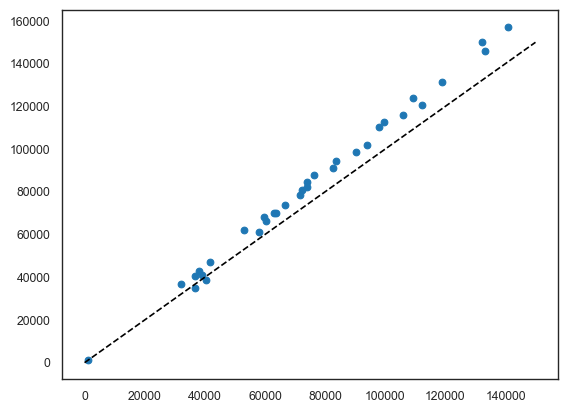

In [333]:
plt.scatter(
    x = lad_data_processor.lad_v_df.T[2021],
    y = census_cars_total[london_lad_list]
)

plt.plot(np.arange(0, 150000), np.arange(0, 150000), '--', color='black')

# Vehicle Ownership Rates

In [500]:
combined_gdf['vehicles_per_household'] = lad_data_processor.lad_v_df.T[2024] / standing_still_df.loc[london_lad_list, 'Total households']

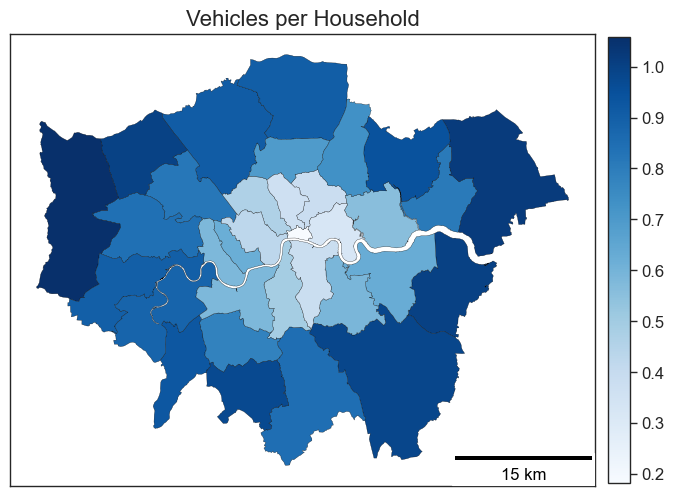

In [501]:
fig, ax = plt.subplots(figsize=(8, 12))

# Define normalization based on the column values
norm = mcolors.Normalize(vmin=combined_gdf['vehicles_per_household'].min(), vmax=combined_gdf['vehicles_per_household'].max())
cmap = plt.cm.Blues

# Plot the GeoDataFrame
combined_gdf.plot(
    column='vehicles_per_household',
    cmap=cmap,
    ax=ax,
    edgecolor="black",
    linewidth=0.2,
    legend=False  # Disable default legend
)

# Add a colorbar that matches the plot height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.02)  
cbar.ax.tick_params(labelsize=12)

# Add scale bar
ax.add_artist(ScaleBar(1, units='m', length_fraction=0.25, location='lower right', font_properties={"size": 12}))

# Remove ticks
ax.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

ax.set_title('Vehicles per Household', fontsize=16)

plt.show()

# Highlighting the Deficit in Public Charging Provision

In [484]:
charging_potential = standing_still_df.loc[london_lad_list, 'Households with off-street parking or parking potential'] + combined_gdf['Public EV Chargers (Points)']
charging_potential

GB Local Authority District
City of London              118
Barking and Dagenham      45881
Barnet                    78471
Bexley                    69297
Brent                     51888
Bromley                   88713
Camden                    11816
Croydon                   78495
Ealing                    65552
Enfield                   67272
Greenwich                 45617
Hackney                   15355
Hammersmith and Fulham    13179
Haringey                  26583
Harrow                    61074
Havering                  78461
Hillingdon                77628
Hounslow                  51985
Islington                 11590
Kensington and Chelsea     8222
Kingston upon Thames      40522
Lambeth                   27874
Lewisham                  48859
Merton                    45612
Newham                    25585
Redbridge                 69153
Richmond upon Thames      43075
Southwark                 23745
Sutton                    50975
Tower Hamlets              9893
Waltham Fore

In [502]:
c_a = charging_potential / lad_data_processor.lad_v_df.T[2024]
c_a

GB Local Authority District
City of London            0.098333
Barking and Dagenham      0.760879
Barnet                    0.603623
Bexley                    0.707835
Brent                     0.637445
Bromley                   0.650866
Camden                    0.339540
Croydon                   0.608017
Ealing                    0.628495
Enfield                   0.616044
Greenwich                 0.638000
Hackney                   0.418392
Hammersmith and Fulham    0.349576
Haringey                  0.471330
Harrow                    0.673363
Havering                  0.737415
Hillingdon                0.658981
Hounslow                  0.585417
Islington                 0.390236
Kensington and Chelsea    0.236264
Kingston upon Thames      0.664295
Lambeth                   0.496863
Lewisham                  0.700990
Merton                    0.714922
Newham                    0.408706
Redbridge                 0.719594
Richmond upon Thames      0.608404
Southwark                 0

In [503]:
combined_gdf['c_a'] = c_a

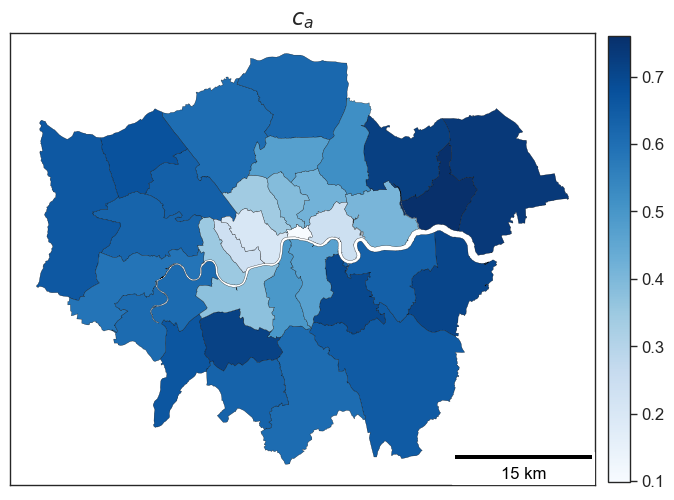

In [504]:
fig, ax = plt.subplots(figsize=(8, 12))

# Define normalization based on the column values
norm = mcolors.Normalize(vmin=combined_gdf['c_a'].min(), vmax=combined_gdf['c_a'].max())
cmap = plt.cm.Blues

# Plot the GeoDataFrame
combined_gdf.plot(
    column='c_a',
    cmap=cmap,
    ax=ax,
    edgecolor="black",
    linewidth=0.2,
    legend=False  # Disable default legend
)

# Add a colorbar that matches the plot height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.02)  
cbar.ax.tick_params(labelsize=12)

# Add scale bar
ax.add_artist(ScaleBar(1, units='m', length_fraction=0.25, location='lower right', font_properties={"size": 12}))

# Remove ticks
ax.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

ax.set_title('$c_a$', fontsize=16)

plt.show()

# If Every Car Was an EV, How Many Private Chargers Would We Need?

In [505]:
lad_data_processor.lad_v_df.T[2024]

Geography
City of London              1200.0
Barking and Dagenham       60300.0
Barnet                    130000.0
Bexley                     97900.0
Brent                      81400.0
Bromley                   136300.0
Camden                     34800.0
Croydon                   129100.0
Ealing                    104300.0
Enfield                   109200.0
Greenwich                  71500.0
Hackney                    36700.0
Hammersmith and Fulham     37700.0
Haringey                   56400.0
Harrow                     90700.0
Havering                  106400.0
Hillingdon                117800.0
Hounslow                   88800.0
Islington                  29700.0
Kensington and Chelsea     34800.0
Kingston upon Thames       61000.0
Lambeth                    56100.0
Lewisham                   69700.0
Merton                     63800.0
Newham                     62600.0
Redbridge                  96100.0
Richmond upon Thames       70800.0
Southwark                  50700.0
Sutton    

In [506]:
standing_still_df.loc[london_lad_list, 'Households with off-street parking or parking potential']

GB Local Authority District
City of London                5
Barking and Dagenham      45756
Barnet                    77941
Bexley                    69143
Brent                     51075
Bromley                   88516
Camden                    11246
Croydon                   78095
Ealing                    64650
Enfield                   66995
Greenwich                 45019
Hackney                   14948
Hammersmith and Fulham    10942
Haringey                  26234
Harrow                    60957
Havering                  78274
Hillingdon                77043
Hounslow                  51291
Islington                 11078
Kensington and Chelsea     7499
Kingston upon Thames      40158
Lambeth                   27384
Lewisham                  48511
Merton                    44544
Newham                    25205
Redbridge                 68936
Richmond upon Thames      42479
Southwark                 21787
Sutton                    50711
Tower Hamlets              9363
Waltham Fore

Let's assume all household off-street parking spaces are occupied (1 vehicle for now)

Number of required public chargers = Number of EVs - Number of off-street parking spaces

In [508]:
required_public_chargers = lad_data_processor.lad_v_df.T[2024] - standing_still_df.loc[london_lad_list, 'Households with off-street parking or parking potential']
required_public_chargers

Geography
City of London             1195.0
Barking and Dagenham      14544.0
Barnet                    52059.0
Bexley                    28757.0
Brent                     30325.0
Bromley                   47784.0
Camden                    23554.0
Croydon                   51005.0
Ealing                    39650.0
Enfield                   42205.0
Greenwich                 26481.0
Hackney                   21752.0
Hammersmith and Fulham    26758.0
Haringey                  30166.0
Harrow                    29743.0
Havering                  28126.0
Hillingdon                40757.0
Hounslow                  37509.0
Islington                 18622.0
Kensington and Chelsea    27301.0
Kingston upon Thames      20842.0
Lambeth                   28716.0
Lewisham                  21189.0
Merton                    19256.0
Newham                    37395.0
Redbridge                 27164.0
Richmond upon Thames      28321.0
Southwark                 28913.0
Sutton                    30089.0
Towe

Of course, we don't nessesarily need one public charger per EV without a dedicated off-street home charger. 

Let's say we can tollerate a 1 charger to 2 car ratio.

In [540]:
required_public_chargers = np.ceil((lad_data_processor.lad_v_df.T[2024] - standing_still_df.loc[london_lad_list, 'Households with off-street parking or parking potential']) / 2)
required_public_chargers

Geography
City of London              598.0
Barking and Dagenham       7272.0
Barnet                    26030.0
Bexley                    14379.0
Brent                     15163.0
Bromley                   23892.0
Camden                    11777.0
Croydon                   25503.0
Ealing                    19825.0
Enfield                   21103.0
Greenwich                 13241.0
Hackney                   10876.0
Hammersmith and Fulham    13379.0
Haringey                  15083.0
Harrow                    14872.0
Havering                  14063.0
Hillingdon                20379.0
Hounslow                  18755.0
Islington                  9311.0
Kensington and Chelsea    13651.0
Kingston upon Thames      10421.0
Lambeth                   14358.0
Lewisham                  10595.0
Merton                     9628.0
Newham                    18698.0
Redbridge                 13582.0
Richmond upon Thames      14161.0
Southwark                 14457.0
Sutton                    15045.0
Towe

For households with off-street parking, what's the average occupancy?

In [520]:
london_census_cars = census_cars.set_index('Lower tier local authorities').loc[london_lad_list]
london_census_cars

Lower tier local authorities Code  \
Lower tier local authorities                                     
City of London                                       E09000001   
City of London                                       E09000001   
City of London                                       E09000001   
City of London                                       E09000001   
Barking and Dagenham                                 E09000002   
...                                                        ...   
Wandsworth                                           E09000032   
Westminster                                          E09000033   
Westminster                                          E09000033   
Westminster                                          E09000033   
Westminster                                          E09000033   

                              Car or van availability (5 categories) Code  \
Lower tier local authorities                                                
City of London                                                          0   
City of London                                                          1   
City of London                                                          2   
City of London                                                          3   
Barking and Dagenham                                                    0   
...                                                                   ...   
Wandsworth                                                              3   
Westminster                                                             0   
Westminster                                                             1   
Westminster                                                             2   
Westminster                                                             3   

                             Car or van availability (5 categories)  \
Lower tier local authorities                                          
City of London                         No cars or vans in household   
City of London                            1 car or van in household   
City of London                          2 cars or vans in household   
City of London                  3 or more cars or vans in household   
Barking and Dagenham                   No cars or vans in household   
...                                                             ...   
Wandsworth                      3 or more cars or vans in household   
Westminster                            No cars or vans in household   
Westminster                               1 car or van in household   
Westminster                             2 cars or vans in household   
Westminster                     3 or more cars or vans in household   

                              Observation  car_counts  
Lower tier local authorities                           
City of London                       3793           0  
City of London                        954         954  
City of London                        123         246  
City of London                         43         129  
Barking and Dagenham                25682           0  
...                                   ...         ...  
Wandsworth                           2199        6597  
Westminster                         62789           0  
Westminster                         26309       26309  
Westminster                          4670        9340  
Westminster                          1047        3141  

[132 rows x 5 columns]

In [526]:
households_with_cars = standing_still_df.loc[london_lad_list, 'Total households'] - london_census_cars[london_census_cars['Car or van availability (5 categories) Code'] == 0]['Observation']
households_with_cars

GB Local Authority District
City of London              2794
Barking and Dagenham       48634
Barnet                     98196
Bexley                     76266
Brent                      47249
Bromley                   107467
Camden                     16104
Croydon                   100797
Ealing                     74718
Enfield                    83398
Greenwich                  64755
Hackney                    26267
Hammersmith and Fulham     18366
Haringey                   25893
Harrow                     68646
Havering                   82678
Hillingdon                 86941
Hounslow                   65093
Islington                  17017
Kensington and Chelsea     17027
Kingston upon Thames       48985
Lambeth                    36010
Lewisham                   60030
Merton                     54456
Newham                     52606
Redbridge                  73476
Richmond upon Thames       59654
Southwark                  53686
Sutton                     64113
Tower Hamlets  

In [528]:
cars_per_household_with_cars = lad_data_processor.lad_v_df.T[2024] / households_with_cars
cars_per_household_with_cars 

Geography
City of London            0.429492
Barking and Dagenham      1.239873
Barnet                    1.323883
Bexley                    1.283665
Brent                     1.722788
Bromley                   1.268296
Camden                    2.160954
Croydon                   1.280792
Ealing                    1.395915
Enfield                   1.309384
Greenwich                 1.104162
Hackney                   1.397190
Hammersmith and Fulham    2.052706
Haringey                  2.178195
Harrow                    1.321271
Havering                  1.286920
Hillingdon                1.354942
Hounslow                  1.364202
Islington                 1.745314
Kensington and Chelsea    2.043813
Kingston upon Thames      1.245279
Lambeth                   1.557901
Lewisham                  1.161086
Merton                    1.171588
Newham                    1.189978
Redbridge                 1.307910
Richmond upon Thames      1.186844
Southwark                 0.944380
Sutton    

In [529]:
combined_gdf['cars_per_household_with_cars'] = cars_per_household_with_cars

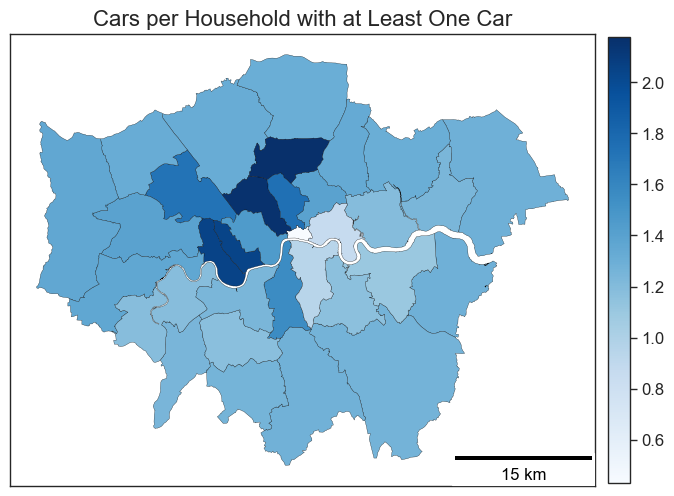

In [530]:
fig, ax = plt.subplots(figsize=(8, 12))

# Define normalization based on the column values
norm = mcolors.Normalize(vmin=combined_gdf['cars_per_household_with_cars'].min(), vmax=combined_gdf['cars_per_household_with_cars'].max())
cmap = plt.cm.Blues

# Plot the GeoDataFrame
combined_gdf.plot(
    column='cars_per_household_with_cars',
    cmap=cmap,
    ax=ax,
    edgecolor="black",
    linewidth=0.2,
    legend=False  # Disable default legend
)

# Add a colorbar that matches the plot height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.02)  
cbar.ax.tick_params(labelsize=12)

# Add scale bar
ax.add_artist(ScaleBar(1, units='m', length_fraction=0.25, location='lower right', font_properties={"size": 12}))

# Remove ticks
ax.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

ax.set_title('Cars per Household with at Least One Car', fontsize=16)

plt.show()

Let's say each household with off-street parking can have up to 2 cars. How does that affect the number of required public chargers?

In [545]:
required_public_chargers = np.clip((lad_data_processor.lad_v_df.T[2024] - 2*standing_still_df.loc[london_lad_list, 'Households with off-street parking or parking potential']) / 2, 0, np.inf)
required_public_chargers

Geography
City of London              595.0
Barking and Dagenham          0.0
Barnet                        0.0
Bexley                        0.0
Brent                         0.0
Bromley                       0.0
Camden                     6154.0
Croydon                       0.0
Ealing                        0.0
Enfield                       0.0
Greenwich                     0.0
Hackney                    3402.0
Hammersmith and Fulham     7908.0
Haringey                   1966.0
Harrow                        0.0
Havering                      0.0
Hillingdon                    0.0
Hounslow                      0.0
Islington                  3772.0
Kensington and Chelsea     9901.0
Kingston upon Thames          0.0
Lambeth                     666.0
Lewisham                      0.0
Merton                        0.0
Newham                     6095.0
Redbridge                     0.0
Richmond upon Thames          0.0
Southwark                  3563.0
Sutton                        0.0
Towe

In [546]:
required_public_chargers[required_public_chargers > 0]

Geography
City of London              595.0
Camden                     6154.0
Hackney                    3402.0
Hammersmith and Fulham     7908.0
Haringey                   1966.0
Islington                  3772.0
Kensington and Chelsea     9901.0
Lambeth                     666.0
Newham                     6095.0
Southwark                  3563.0
Tower Hamlets             11287.0
Wandsworth                10205.0
Westminster               12985.0
dtype: float64

Compare this to existing public charging points

In [554]:
additional_required_public_chargers = np.clip(required_public_chargers - combined_gdf['Public EV Chargers (Points)'], 0, np.inf)
additional_required_public_chargers

Geography
City of London              482.0
Barking and Dagenham          0.0
Barnet                        0.0
Bexley                        0.0
Brent                         0.0
Bromley                       0.0
Camden                     5584.0
Croydon                       0.0
Ealing                        0.0
Enfield                       0.0
Greenwich                     0.0
Hackney                    2995.0
Hammersmith and Fulham     5671.0
Haringey                   1617.0
Harrow                        0.0
Havering                      0.0
Hillingdon                    0.0
Hounslow                      0.0
Islington                  3260.0
Kensington and Chelsea     9178.0
Kingston upon Thames          0.0
Lambeth                     176.0
Lewisham                      0.0
Merton                        0.0
Newham                     5715.0
Redbridge                     0.0
Richmond upon Thames          0.0
Southwark                  1605.0
Sutton                        0.0
Towe

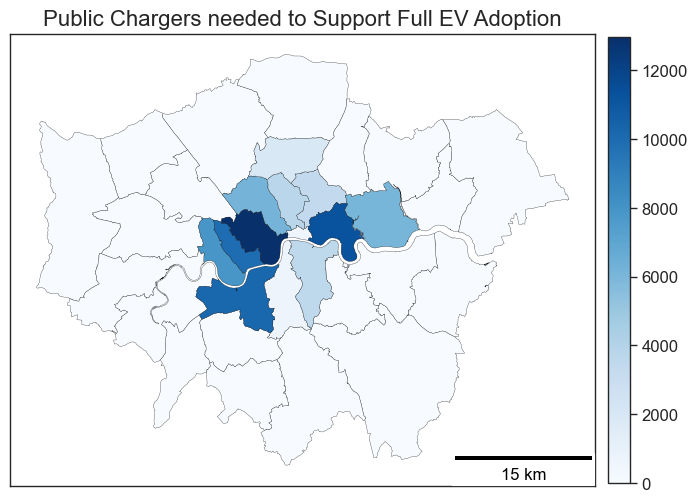

In [551]:
fig, ax = plt.subplots(figsize=(8, 12))

# Define normalization based on the column values
norm = mcolors.Normalize(vmin=required_public_chargers.min(), vmax=required_public_chargers.max())
cmap = plt.cm.Blues

# Plot the GeoDataFrame
gpd.GeoDataFrame(data=required_public_chargers, geometry=combined_gdf.geometry).plot(
    column=0,
    cmap=cmap,
    ax=ax,
    edgecolor="black",
    linewidth=0.2,
    legend=False  # Disable default legend
)

# Add a colorbar that matches the plot height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.02)  
cbar.ax.tick_params(labelsize=12)

# Add scale bar
ax.add_artist(ScaleBar(1, units='m', length_fraction=0.25, location='lower right', font_properties={"size": 12}))

# Remove ticks
ax.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

ax.set_title('Public Chargers needed to Support Full EV Adoption', fontsize=16)

plt.show()

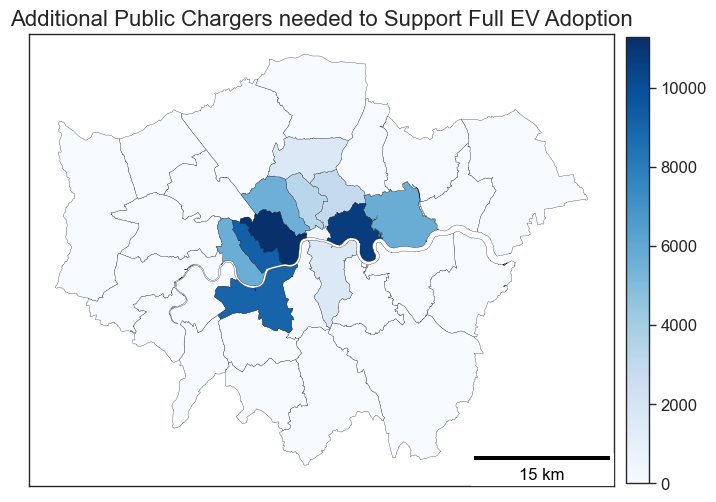

In [555]:
fig, ax = plt.subplots(figsize=(8, 12))

# Define normalization based on the column values
norm = mcolors.Normalize(vmin=additional_required_public_chargers.min(), vmax=additional_required_public_chargers.max())
cmap = plt.cm.Blues

# Plot the GeoDataFrame
gpd.GeoDataFrame(data=additional_required_public_chargers, geometry=combined_gdf.geometry).plot(
    column=0,
    cmap=cmap,
    ax=ax,
    edgecolor="black",
    linewidth=0.2,
    legend=False  # Disable default legend
)

# Add a colorbar that matches the plot height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.02)  
cbar.ax.tick_params(labelsize=12)

# Add scale bar
ax.add_artist(ScaleBar(1, units='m', length_fraction=0.25, location='lower right', font_properties={"size": 12}))

# Remove ticks
ax.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

ax.set_title('Additional Public Chargers needed to Support Full EV Adoption', fontsize=16)

plt.show()

# Congestion Charge and ULEZ

Congestion charge! BEVs are exempt from paying the congestion charge, but this will be discontinued from 25 December 2025

<Axes: >

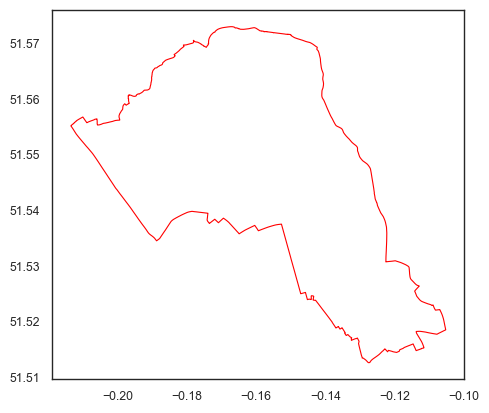

In [477]:
import osmnx as ox

# Search for London Congestion Charge Zone
tags = {"name": "London Congestion Charge", "boundary": "administrative"}
ccz_gdf = ox.geocoder.geocode_to_gdf('London Borough of Camden', which_result=1)

ccz_gdf.plot(edgecolor="red", facecolor="none")

In [390]:
query = {'boundary': 'zone', 'name': 'Congestion Charge Zone'}

# Retrieve the geometry from OpenStreetMap and convert it to a GeoDataFrame
congestion_zone = ox.geocode_to_gdf(query)

# Print the GeoDataFrame to see its contents
print(congestion_zone)

InsufficientResponseError: Nominatim API did not return a list of results.

In [355]:
tags = {"boundary": True}  # Matches anything with a boundary
all_boundaries = ox.features_from_place("London, UK", tags)

print(all_boundaries.columns)  # Inspect available columns
print(all_boundaries["name"].unique())  # See all boundary names

Index(['geometry', 'boundary', 'protect_class', 'related_law', 'format',
       'historic', 'inscription', 'material', 'start_date', 'admin_level',
       ...
       'toll:minibus:conditional', 'toll:motor_vehicle:conditional',
       'heritage:ref', 'ref:whc', 'whc:criteria', 'whc:inscription_date',
       'motor_vehicle:conditional', 'note:en', 'ref:itl:2',
       'wikimedia_commons'],
      dtype='object', length=472)
[nan 'London Borough of Sutton' 'City of Westminster'
 'Royal Borough of Kensington and Chelsea' 'City of London'
 'London Borough of Tower Hamlets' 'London Borough of Hackney'
 'London Borough of Haringey' 'London Borough of Islington'
 'London Borough of Camden' 'London Borough of Barnet'
 'London Borough of Enfield' 'London Borough of Hounslow'
 'Royal Borough of Greenwich' 'London Borough of Bexley'
 'London Borough of Merton' 'London Borough of Wandsworth'
 'London Borough of Croydon' 'Royal Borough of Kingston upon Thames'
 'Hertfordshire' 'Surrey' 'England' 'Uni

In [459]:
tags = {"type": "toll"}  # Matches anything with a boundary
all_boundaries = ox.features_from_place("London, UK", tags)

print(all_boundaries.columns)  # Inspect available columns
print(all_boundaries["name"].unique())  # See all boundary names

InsufficientResponseError: No matching features. Check query location, tags, and log.

In [465]:
tags = {"restriction": True}  # Matches anything with a boundary
all_boundaries = ox.features_from_place("London, UK", tags)

print(all_boundaries.columns)  # Inspect available columns
print(all_boundaries["name"].unique())  # See all boundary names

Index(['geometry', 'restriction', 'except', 'name', 'traffic_sign',
       'traffic_sign:direction', 'highway', 'lanes', 'lit', 'maxspeed',
       'sidewalk', 'source:name', 'surface', 'wikidata', 'bicycle', 'covered',
       'est_width', 'segregated', 'tunnel', 'bicycle:conditional', 'cycleway',
       'description', 'lane_markings', 'motor_vehicle:conditional', 'old_name',
       'oneway', 'oneway:bicycle', 'sidewalk:both', 'width', 'amenity',
       'access', 'parking', 'building', 'access:conditional',
       'capacity:disabled', 'check_date', 'orientation',
       'source:access:conditional', 'area', 'capacity', 'fee',
       'opening_hours'],
      dtype='object')
[nan 'No Entry' 'Portnalls Road' 'Chelsea Embankment'
 'Deptford High Street']


In [466]:
all_boundaries

geometry  \
element id                                                              
node    931625777                           POINT (-0.13991 51.54041)   
        9335280719                          POINT (-0.11143 51.45782)   
        9597690234                          POINT (-0.09676 51.50435)   
way     19801745    LINESTRING (-0.14393 51.31917, -0.14394 51.319...   
        44435117     LINESTRING (-0.16706 51.48325, -0.1673 51.48322)   
        614623591   LINESTRING (-0.02595 51.47761, -0.02593 51.477...   
        975468268   POLYGON ((0.01516 51.48927, 0.01513 51.48928, ...   
        975468269   POLYGON ((0.01519 51.48926, 0.01516 51.48927, ...   
        975468270   POLYGON ((0.01522 51.48925, 0.01519 51.48926, ...   
        975468271   POLYGON ((0.01525 51.48925, 0.01522 51.48925, ...   
        975468272   POLYGON ((0.01529 51.48924, 0.01525 51.48925, ...   
        975468273   POLYGON ((0.01532 51.48923, 0.01529 51.48924, ...   
        975468274   POLYGON ((0.01535 51.48922, 0.01532 51.48923, ...   
        975468275   POLYGON ((0.01538 51.48921, 0.01535 51.48922, ...   
        975468276   POLYGON ((0.01541 51.4892, 0.01538 51.48921, 0...   
        975468277   POLYGON ((0.01544 51.48919, 0.01541 51.4892, 0...   
        975468278   POLYGON ((0.01547 51.48918, 0.01544 51.48919, ...   
        975468279   POLYGON ((0.0155 51.48917, 0.01547 51.48918, 0...   
        975468280   POLYGON ((0.01553 51.48916, 0.0155 51.48917, 0...   
        975468281   POLYGON ((0.01556 51.48915, 0.01553 51.48916, ...   
        975468282   POLYGON ((0.01559 51.48914, 0.01556 51.48915, ...   
        975468283   POLYGON ((0.01562 51.48914, 0.01559 51.48914, ...   
        975468284   POLYGON ((0.01566 51.48913, 0.01562 51.48914, ...   
        975468285   POLYGON ((0.01569 51.48912, 0.01566 51.48913, ...   
        975468286   POLYGON ((0.01572 51.48911, 0.01569 51.48912, ...   
        975468287   POLYGON ((0.01575 51.4891, 0.01572 51.48911, 0...   
        1136392228  POLYGON ((-0.14375 51.49101, -0.14366 51.49104...   
        1206969130  POLYGON ((0.00616 51.54684, 0.00617 51.5468, 0...   
        1304695618  POLYGON ((-0.26542 51.51938, -0.26541 51.5194,...   

                                restriction   except                  name  \
element id                                                                   
node    931625777             no_right_turn      NaN                   NaN   
        9335280719                 no_entry  bicycle              No Entry   
        9597690234                 no_entry  bicycle                   NaN   
way     19801745                     No HGV      NaN        Portnalls Road   
        44435117    low headroom (cyclists)      NaN    Chelsea Embankment   
        614623591             market street      NaN  Deptford High Street   
        975468268              loading_only      NaN                   NaN   
        975468269              loading_only      NaN                   NaN   
        975468270              loading_only      NaN                   NaN   
        975468271              loading_only      NaN                   NaN   
        975468272              loading_only      NaN                   NaN   
        975468273              loading_only      NaN                   NaN   
        975468274              loading_only      NaN                   NaN   
        975468275              loading_only      NaN                   NaN   
        975468276              loading_only      NaN                   NaN   
        975468277              loading_only      NaN                   NaN   
        975468278              loading_only      NaN                   NaN   
        975468279              loading_only      NaN                   NaN   
        975468280              loading_only      NaN                   NaN   
        975468281              loading_only      NaN                   NaN   
        975468282              loading_only      NaN                   NaN   
   

In [ ]:
tags = {"boundary": True}  # Matches anything with a boundary
all_boundaries = ox.features_from_place("London, UK", tags)

print(all_boundaries.columns)  # Inspect available columns
print(all_boundaries["name"].unique())  # See all boundary names

In [394]:
all_boundaries["name"].unique().size

282

In [458]:
all_boundaries["name"].unique()[263]

'Essex - Greater London'

In [360]:
all_boundaries['name']

element   id        
node      5354765334                            NaN
          5960167295                            NaN
          5961146236                            NaN
          5961146237                            NaN
relation  17529            London Borough of Sutton
                                   ...             
way       1334504570                            NaN
          1337968978                            NaN
          1337968979                            NaN
          1337969646        Greater London - Surrey
          1375704242    Hillfield Conservation Area
Name: name, Length: 1170, dtype: object

In [387]:
all_boundaries['name'].str.contains("London Congestion Charge Zone").sum()

0

In [368]:
all_boundaries['name'].str.contains("London")

element   id        
node      5354765334      NaN
          5960167295      NaN
          5961146236      NaN
          5961146237      NaN
relation  17529          True
                        ...  
way       1334504570      NaN
          1337968978      NaN
          1337968979      NaN
          1337969646     True
          1375704242    False
Name: name, Length: 1170, dtype: object

In [369]:
all_boundaries['name'].str.contains("London").unique()

array([nan, True, False], dtype=object)

In [351]:
tags = {"type": "toll", "name": "London Congestion Charge"}

# Query OSM for features within London that match the tags
ccz_gdf = ox.features_from_place("UK", tags)

# Inspect result
print(ccz_gdf[["name", "geometry"]].head())

# Filter to only polygons or multipolygons (zone boundaries)
ccz_boundary = ccz_gdf[ccz_gdf.geom_type.isin(["Polygon", "MultiPolygon"])]

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
ccz_boundary.plot(ax=ax, edgecolor="red", facecolor="none", linewidth=2)
plt.title("London Congestion Charge Zone", fontsize=14)
plt.show()

/Users/isaacflower/miniconda3/envs/EVForecastingTool/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


KeyboardInterrupt: 